# Populations, Samples, and Estimators 

In this notebook we will examine the relationship between a population, a method for selecting a sample from the populations, and the resulting sample.

When we are in the situation where we have data from the population of interest, then we can directly examine the population distribution and parameters.  In many situations we do not have the population and must work with a sample. Our goal in this case is to make inferences about the population.  In this notebook, we will use the restaurant inspections as an example of a population and draw samples from the populations to figure out how we might use the sample for making inferences about the population.

In [1]:
import os
from pathlib import Path
from IPython.display import display, Latex, Markdown

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn")
sns.set_context("talk")

## Restaurant Inspection Scores - The Population


Recall that we have an administrative data set that contains inspection scores for all restauarants in San Francisco over a three year period. Many restaurants have more than one inspection a year. If our population is restaurants, then we will want to focus on one set of scores. Let's choose one inspection score per restaurant from 2016.

Below, we read in the data, examine a few results, and create our population of restaurant inspection scores in 2016.

In [4]:
dsDir = Path("data/")
ins = pd.read_csv(dsDir/"inspections.csv")

In [5]:
ins.head(10)

,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
3,24,98,20161005,routine
4,24,96,20160311,routine
5,31,98,20151204,routine
6,45,78,20160104,routine
7,45,88,20170307,routine
8,45,85,20170914,routine
9,45,84,20160614,routine


In [6]:
ins.tail(10)

,business_id,score,date,type
14212,93959,100,20171218,routine
14213,93968,98,20171120,routine
14214,93969,98,20171221,routine
14215,93977,96,20171219,routine
14216,94012,100,20171220,routine
14217,94012,90,20180112,routine
14218,94133,100,20171227,routine
14219,94142,100,20171220,routine
14220,94189,96,20171130,routine
14221,94231,85,20171214,routine


We select one score per restaurant in 2016.

In [10]:
ins['new_date'] = ins['date'].apply(lambda d: pd.datetime.strptime(str(d),'%Y%m%d'))
ins['year']     = ins['new_date'].apply(lambda d: d.year)

ins = ins[ins['year']==2016].groupby('business_id').last().copy()

In [11]:
print("Number of Restaurants:", len(ins))
ins.head(10)

Number of Restaurants: 4195


,score,date,type,new_date,year
business_id,,,,,
19,94,20160513,routine,2016-05-13,2016
24,96,20160311,routine,2016-03-11,2016
45,84,20160614,routine,2016-06-14,2016
48,94,20160630,routine,2016-06-30,2016
56,90,20160802,routine,2016-08-02,2016
58,73,20160407,routine,2016-04-07,2016
61,94,20160708,routine,2016-07-08,2016
66,100,20160902,routine,2016-09-02,2016
67,94,20161019,routine,2016-10-19,2016


In [12]:
ins.tail(10)

,score,date,type,new_date,year
business_id,,,,,
89687,92,20161129,routine,2016-11-29,2016
89701,100,20161206,routine,2016-12-06,2016
89790,96,20161129,routine,2016-11-29,2016
89803,100,20161215,routine,2016-12-15,2016
89900,93,20161206,routine,2016-12-06,2016
89931,100,20161207,routine,2016-12-07,2016
90041,100,20161215,routine,2016-12-15,2016
90096,91,20161229,routine,2016-12-29,2016
90268,100,20161229,routine,2016-12-29,2016


### Population Distribution

Let's look at the distribution of inspections scores for the restaurant population. 

In [15]:
scoreCts = ins['score'].value_counts().sort_index()
scoreCts

52       1
55       3
56       3
57       5
58       1
59       4
60       2
61       5
62       5
63       4
64       3
65       8
66      11
67      13
68      21
69      10
70      20
71      26
72      25
73      26
74      33
75      32
76      31
77      44
78      56
79      55
80      67
81      84
82      81
83     109
84      86
85     108
86     173
87     154
88     164
89     113
90     306
91      99
92     352
93      74
94     394
96     475
98     306
100    603
Name: score, dtype: int64

Notice that scores are integer values and for this population they range between 52 and 100. There are no restaurants with a score of 95, 97, or 99. We make a bar plot (rather than a histogram) so that we can see all of the possible values for inspection score for the restaurants. 

Text(0,0.5,'Frequency')

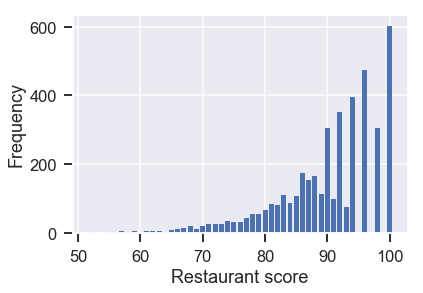

In [16]:
plt.bar(scoreCts.index.values, scoreCts.values)
plt.xlabel('Restaurant score')
plt.ylabel('Frequency')
#plt.savefig("barplot_counts.pdf")

Ideally, we want percentages on the y axis.  This will it easier for us to compare the population distribution with the distribution of a sample and the probability distribution of a random draw from the population. 

In [23]:
100 * scoreCts/scoreCts.sum()

52      0.023838
55      0.071514
56      0.071514
57      0.119190
58      0.023838
59      0.095352
60      0.047676
61      0.119190
62      0.119190
63      0.095352
64      0.071514
65      0.190703
66      0.262217
67      0.309893
68      0.500596
69      0.238379
70      0.476758
71      0.619785
72      0.595948
73      0.619785
74      0.786651
75      0.762813
76      0.738975
77      1.048868
78      1.334923
79      1.311085
80      1.597139
81      2.002384
82      1.930870
83      2.598331
84      2.050060
85      2.574493
86      4.123957
87      3.671037
88      3.909416
89      2.693683
90      7.294398
91      2.359952
92      8.390942
93      1.764005
94      9.392133
96     11.323004
98      7.294398
100    14.374255
Name: score, dtype: float64

We could have normaized the counts to begin with as follows.

In [20]:
scoreCts = 100 * ins['score'].value_counts(normalize = True).sort_index()
scoreCts

52      0.023838
55      0.071514
56      0.071514
57      0.119190
58      0.023838
59      0.095352
60      0.047676
61      0.119190
62      0.119190
63      0.095352
64      0.071514
65      0.190703
66      0.262217
67      0.309893
68      0.500596
69      0.238379
70      0.476758
71      0.619785
72      0.595948
73      0.619785
74      0.786651
75      0.762813
76      0.738975
77      1.048868
78      1.334923
79      1.311085
80      1.597139
81      2.002384
82      1.930870
83      2.598331
84      2.050060
85      2.574493
86      4.123957
87      3.671037
88      3.909416
89      2.693683
90      7.294398
91      2.359952
92      8.390942
93      1.764005
94      9.392133
96     11.323004
98      7.294398
100    14.374255
Name: score, dtype: float64

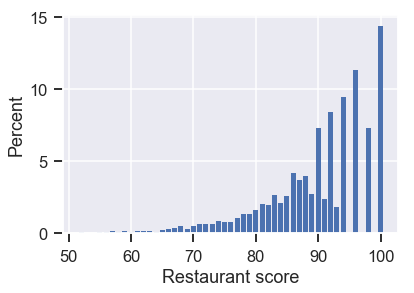

In [21]:
plt.bar(scoreCts.index.values, scoreCts)
plt.xlabel('Restaurant score')
plt.ylabel('Percent')
#plt.savefig("barplot_percent.pdf")
plt.show()

### Population parameters - average and SD

We can examine simple summaries of the population distribution such as the average inspection score and the standard deviation of the inspection score. 

Below we show that the sample average can be computed as a weighted average of the unique values in the population, where the weight for an inspection score is the proportion of restaurants with that score. That is,

$$\large
\texttt{Population Average} = \frac{1}{N} \sum_{i=1}^N x_i,
$$

where $x_i$ is the score for restaurant $i$, for $i=1, \ldots, N$.

Suppose there are $m$ unique values for the score, for $j = 1, \ldots, m$. Then, we can equivalently
express the population average as 

$$\large
\texttt{Population Average} = \sum_{j=1}^m v_j \times p_j,
$$

where $p_j$ is the proportion of the population with score $v_j$.

In [ ]:
scoreCts.index.values * scoreCts / 100

In [25]:
print("The population average is: ", ins['score'].mean() )

print("Another way to compute this is as a weighted sum: ",
      (scoreCts.index.values * scoreCts / 100).sum())

The population average is:  90.1983313468
Another way to compute this is as a weighted sum:  90.1983313468


The standard deviation (SD) of the scores is a measure of the typical deviations of an inspection score from the population mean. It is also called the root mean square error about the mean. This alternative name tells us how to compute the SD. 

$$\large
\texttt{Standard Deviation} = \sqrt{\sum_{i=1}^m \left(v_j - \texttt{Pop Avg} \right)^2 p_j}
$$

Working from the inside outward, we see that we are examining the error about the mean (the loss), squaring it, taking the mean, and then the square root. 

The `std` function performs this computation for us.

In [26]:
print("The population SD is: ", ins['score'].std())

The population SD is:  8.22140843077


The population of restaurants in 2016 in San Francisco have an average inspection score of 90 with a SD of 8.3. 

## Probability Distribution of Draws from the population

In order to investigate the probability distribution of a draw from the population, we start with a much simpler example where the population is very small. This will make it easier for us to make probability calculations and generalize from these calculations to drawing from a more general population.

We set up a small population with 5 inspection scores: 80, 80, 92, 92, 96.
As before, we can examine the population distribution, mean, and SD.

In [27]:
scores_tiny = pd.Series([80, 80, 92, 92, 96], name="score")

In [32]:
scores_tiny = pd.Series([80, 80, 92, 92, 96], name="score")

scoreCts_tiny = scores_tiny.value_counts(sort = True)

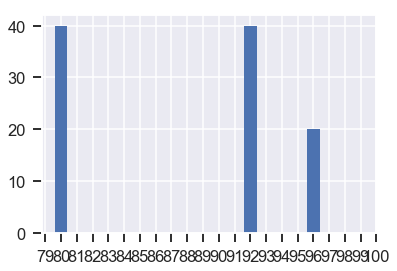

The tiny population mean is:  88.0
The tiny population SD is:  7.48331477355


In [33]:
plt.bar(scoreCts_tiny.index.values, 100 * scoreCts_tiny/scoreCts_tiny.sum())
plt.xticks(np.arange(79, 101, 1))
#plt.savefig("barplot_percent_tiny.pdf")
plt.show()

print("The tiny population mean is: ", scores_tiny.mean()) 
print("The tiny population SD is: ", scores_tiny.std() )

### Draw one score at random 

For this population, it is relatively easy for us to consider the *probability distribution* of one draw at random. When we say at random, we mean with equal chance.

If $X$ represents the possible outcome of this chance process, then $X$ can take on the value of 80 or 92 or 96. The *probability distribution* of $X$ summarizes the chance of each of these possible outcomes. We can summarize these probabilities in a table:


|outcome | 80 | 92 | 96 |
|---|---|---|---|
|chance | 2/5 | 2/5 | 1/5|

### What do we expect?

What do we expect $X$ to be? To get a sense of this, we can use the computer to take a sample
and repeat again and again to see how the results vary. We first repeat only 3 times to see how the values of $X$ vary. 

In [39]:
np.random.seed(37)
print("One sampled score", scores_tiny.sample(1), 
      "\nAnother sampled score", scores_tiny.sample(1),
      "\nAnd another", scores_tiny.sample(1))

One sampled score 2    92
Name: score, dtype: int64 
Another sampled score 0    80
Name: score, dtype: int64 
And another 3    92
Name: score, dtype: int64


On the first draw, we got 92, on the second 80 and the third is the same as the first. 

Let's repeat this process one thousand times to see what the distribution of possible values for $X$ looks like. 

In [61]:
np.random.seed(77)
samples_tiny = pd.Series([scores_tiny.sample(1, replace = True).values[0] 
                          for _ in range(1000)])
samples_tiny.describe()

count    1000.000000
mean       88.336000
std         6.716861
min        80.000000
25%        80.000000
50%        92.000000
75%        92.000000
max        96.000000
dtype: float64

We see that the average value for the 1000 realizations of $X$ is 88.3. Recall that the population average is 88. We also see that the standard deviation of these 1000 realizations is 6.7. For comparison the SD of the population is 7.5.

This simulation that we performed gives us some insight as to the *Expected Value* of $X$ and the *Standard Deviation* of $X$. 

Let's also examine the proportions of the 1000 values of $X$ that are 80, 92, and 96.

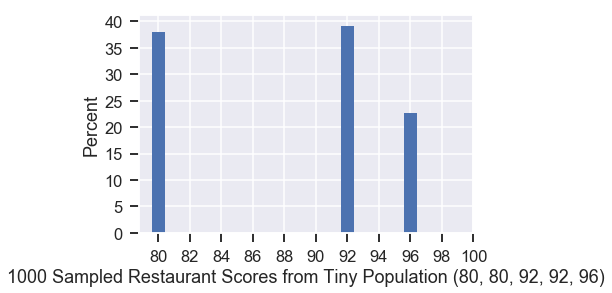

In [65]:
scoreCts_samp = 100 * pd.value_counts(samples_tiny, normalize = True)

barSample = plt.bar(scoreCts_samp.index.values, scoreCts_samp.values)
plt.xticks(np.arange(80, 101, 2))
plt.yticks(np.arange(0, 45, 5))
plt.xlabel('1000 Sampled Restaurant Scores from Tiny Population (80, 80, 92, 92, 96)')
plt.ylabel('Percent')
plt.show()

Notice that the simulation produced proportions that are close to the probabilities. That is, in 1000 simulated draws from our tiny population, about 38% of the draws were 80. In comparison, the chance that $X$ is 80 is $2/5$ or 40%.

### From Simulation to Proof

The simulation gave us several insights: 

* The probability distribution of $X$ matches the population distribution 
* The expected value of $X$ is the population average.
* The SD of $X$ is the population SD.

Actually, we had figured the first of these discoveries out already. The last two of the discoveries, we can prove analytically. See the posted course notes.

Let's confirm that these discoveries hold for our larger population of all restaurants in San Francisco.

In [72]:
np.random.seed(707)
samples = ins['score'].sample(1000, replace = True)
samples.describe()

count    1000.0000
mean       90.1250
std         8.1713
min        55.0000
25%        86.0000
50%        92.0000
75%        96.0000
max       100.0000
Name: score, dtype: float64

Recall that our population mean is 90 and SD is 8.3. 

Let's examine the distribution of the 1000 simulated values of $X$ and compare this simulated distribution to the population distribution.

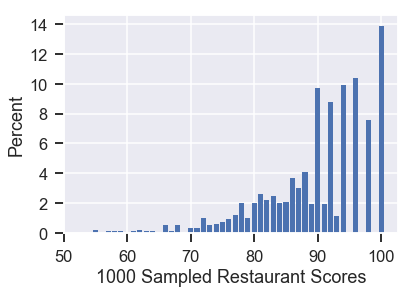

In [74]:
scoreCts_samp = 100 * pd.value_counts(samples, normalize = True)

barSample = plt.bar(scoreCts_samp.index.values, scoreCts_samp.values)
plt.xticks(np.arange(50, 101, 10))
plt.yticks(np.arange(0, 15, 2))
plt.xlabel('1000 Sampled Restaurant Scores')
plt.ylabel('Percent')
#plt.savefig("barplot_samp1000.pdf")
plt.show()

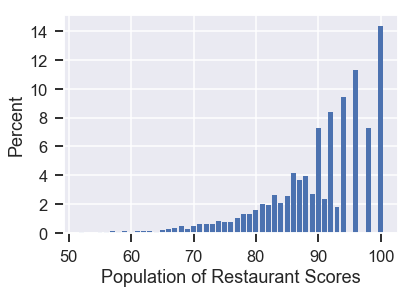

In [75]:
barPop = plt.bar(scoreCts.index.values, scoreCts.values)
plt.xticks(np.arange(50, 101, 10))
plt.yticks(np.arange(0, 15, 2))
plt.xlabel('Population of Restaurant Scores')
plt.ylabel('Percent')
#plt.savefig("barplot_pop.pdf")
plt.show()

Notice that in our sample of 1000 we did not observe all of the lowest values because these have low proportions in our population.

### Sampling 100 restaurants

Now suppose we take a sample of 100 restaurants at random *without* replacement.

What does any one sample look like?

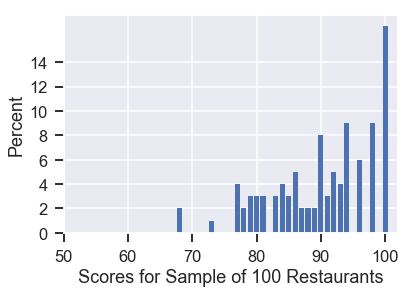

In [76]:
np.random.seed(107)
samples = ins['score'].sample(100, replace = False)
scoreCts_samp = pd.value_counts(samples, sort = True)

barSample = plt.bar(scoreCts_samp.keys(), 
                    100 * scoreCts_samp.values/scoreCts_samp.values.sum())
plt.xticks(np.arange(50, 101, 10))
plt.yticks(np.arange(0, 15, 2))
plt.xlabel('Scores for Sample of 100 Restaurants')
plt.ylabel('Percent')
#plt.savefig("barplot_samp100.pdf")
plt.show()

In [77]:
samples.mean()

90.200000000000003

The sample looks similar to the population distribution, although it's clearly different.


Consider the 100 random variables, $X_1$, $X_2$, ... $X_{100}$ that result from 100 draws at random without replacement from the population. Each of these random variables has the same distribution. This implies that 
$$\large
\textbf{E}(X_i) = \texttt{population average}
$$ 
In turn, this then implies that 
$$\large
\textbf{E}(\bar{X}) = \texttt{population average}
$$ 
(See the probability handout for a proof).

Since the $X_i$ have the same distribution, we also find that 
$$\large
SD(X_i) = \textrm{population SD} = \sigma
$$ 
However,  
$$\large
SD(\bar{X}) = \frac{N-n}{N-1}\frac{\sigma}{\sqrt{n}},
$$
rather than $\frac{\sigma}{\sqrt{n}}$ because the $X_i$ are dependent random variables.

We can use simulation studies to develop insight into these results and others.

### Simulating the Probability Distribution of $\bar{X}$

What does the probabiity distribution of the sample average look like? 

We can simulate this distribution by taking 1000 replications: where for each replicate we take a simple random sample of 100 values from the population and find the sample average.  Repeating this 1000 times gives us an idea as to what the *sampling distribution* of the average looks like.  

In [78]:
np.random.seed(707)
res = pd.Series([
    ins['score'].sample(100, replace = False).mean() 
    for _ in range(1000)
])
res.describe()

count    1000.000000
mean       90.246370
std         0.805485
min        86.930000
25%        89.730000
50%        90.285000
75%        90.790000
max        92.480000
dtype: float64

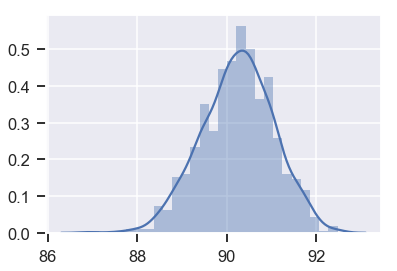

In [79]:
sns.distplot(res)
#plt.savefig('mean_hist1000v2.pdf')

As noted earlier, the simulation indicates that expected value of $\bar{X}$ should match the population average, which is 90. We can also see that the SD of $\bar{X}$ is about $(4443/4542) \times \sigma/\sqrt{100} \approx 0.82$. When we compute an SD of a statistics, we usually called is the *Standard Error* or SE for short.  

Notice that we have discovered via simulation that the probability distribution of the sample average roughly looks like the normal curve. It is unimodal, symmetric, with neither long nor short tails. 

## Monte Carlo

We will carry out some more detailed simulation studies to examine the expected value, standard deviation, and distribution of the sample average for averages of different sizes.
In the process we will confirm our theoretical results and discover new ones.

These are examples of a simple but powerful approach to studying random processes through simulation. The technique that we have been using is called Monte Carlo simulation. Briefly, suppose that we want to study the behavior of a statistic $T(X_1, \ldots, X_n)$ which is a function of $X_1, \ldots X_n$. (The sample mean, median, Huber estimator are all examples).
Then we can study the behavior of $T$ under different conditions, such as a range of sample sizes, different population distributions, sampling with or without replacement, etc. We perform the Monte Carlo as follows: 

* Take a combination of input values, e.g., sample size and population distribution, which we call a data generation model
* Generate data from this model and calculate the statistic of interest
* Repeat this process many (typically thousands) of times
* Repeat the above process for all combinations of input values (data generation models).

We will study the impact of the sample size on the probability distribution of $\bar{X}$ for the restaurant population and sampling with replacement. 

### Law of Large Numbers - demonstration

We begin by setting up a range of sample sizes that we want to study.

In [91]:
sample_sizes = np.logspace(1, 4, 50, dtype='int')
sample_sizes

array([   10,    11,    13,    15,    17,    20,    23,    26,    30,
          35,    40,    47,    54,    62,    71,    82,    95,   109,
         126,   145,   167,   193,   222,   255,   294,   339,   390,
         449,   517,   596,   686,   790,   910,  1048,  1206,  1389,
        1599,  1842,  2120,  2442,  2811,  3237,  3727,  4291,  4941,
        5689,  6551,  7543,  8685, 10000])

Next we carry out one round of our Monte Carlo study.  That is, we examine the sample average for all of our sample sizes, where we generate only one sample for each size. 

Text(0,0.5,'Average Inspection Score')

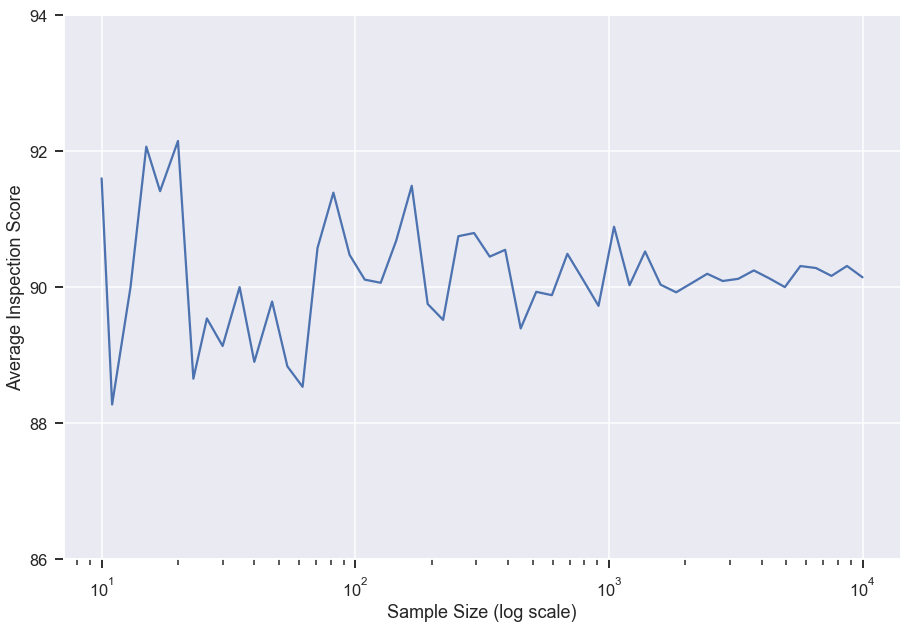

In [94]:
np.random.seed(707)
plt.figure(figsize=(15,10))

pd.Series([
            ins['score'].sample(s, replace = True).mean() 
            for s in sample_sizes
        ], index=sample_sizes).plot()
plt.yticks(np.arange(86, 95, 2))
plt.xscale('log')
plt.xlabel('Sample Size (log scale)')
plt.ylabel('Average Inspection Score')
#plt.savefig('lln.pdf')


It appears that the sample average gets closer to the population average as the sample size grows.  Note that the x-axis is on log scale.

We repeat this process 100 times to get a sense of how quickly the sample average converges to the population mean. Note that we use transparency to help see where are the bulk of values. 

Text(0,0.5,'Average Inspection Score')

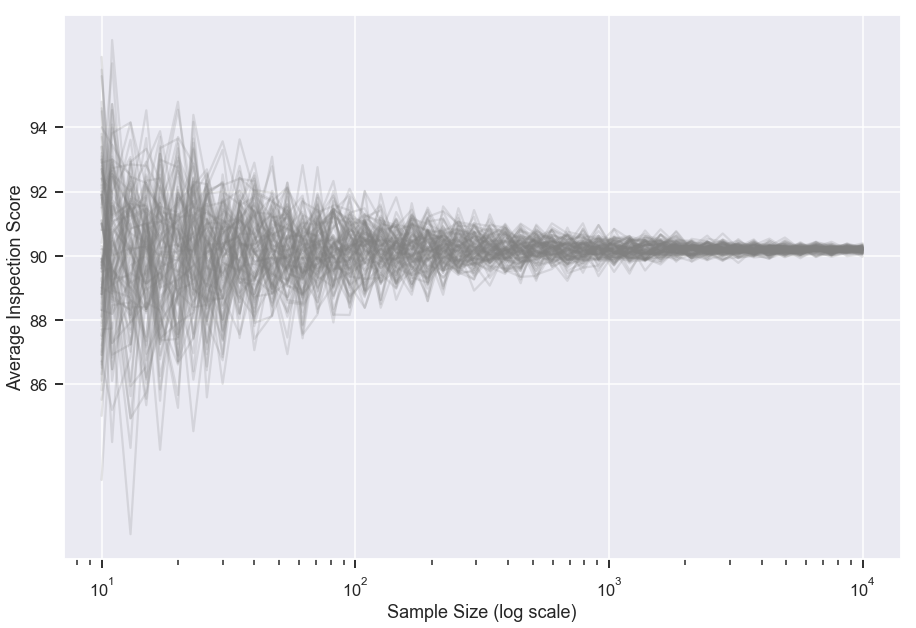

In [101]:
plt.figure(figsize=(15,10))

for i in range(0,100):
    pd.Series([
            ins['score'].sample(s, replace = True).mean() 
            for s in sample_sizes
        ], index=sample_sizes).plot(color='grey', alpha = 0.2)

plt.yticks(np.arange(86, 95, 2))
plt.xscale('log')
plt.xlabel('Sample Size (log scale)')
plt.ylabel('Average Inspection Score')
#plt.savefig('lln_many.pdf')

We have discovered the *Law of Large Numbers*: As the sample size increases, the sample average (from indpendent sample with replacement from a population) converges to the population average. 

### Square-root law

We already know the Square-root Law: The standard error of the sample average shrinks by a facotr of $1/\sqrt{n}$ with the sample size. However, we can confirm this is the case with a simulation study. Again, we vary the sample size. This time we take 1000 replications for each sample size. That is for a particular sample size, we obtain 1000 sample averages, and we find the standard deviation of these 1000 sample averages to approximate the SD of the sample average. 

In [102]:
sample_sizes = np.logspace(1, 4, 50, dtype='int')
sds = []

for s in sample_sizes:
    means = [
        ins['score'].sample(s, replace = True).mean() 
        for _ in range(1000)]
    sds.append(np.std(means))    

Since we want to confirm the Square-root Law, we plot our findings along with our theory, i.e., $\sigma/\sqrt{n}$. The two curves are essentially on top of each other. 

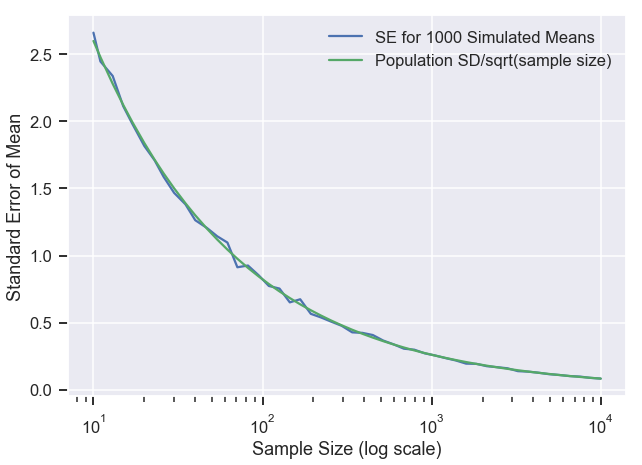

In [110]:
plt.figure(figsize=(10,7))

plt.plot(sample_sizes, sds, label='SE for 1000 Simulated Means')
plt.plot(sample_sizes, ins['score'].std()/np.sqrt(sample_sizes), 
        label='Population SD/sqrt(sample size)')

plt.xscale('log')
plt.xlabel('Sample Size (log scale)')
plt.ylabel('Standard Error of Mean')
plt.legend();
#plt.savefig('sqrt_law.pdf')

### Central Limit Theorem Demonstration

We will discover one more theoretical result via simulation. Note that when we plotted the simulated sampling distribution of the average for 100 samples, we saw that the histogram appeared to roughly follow the normal curve. Let's see how the sampling distribution depends on the sample size. We consider 5 samples sizes: 20, 40, 100, 400, 1000.

In [111]:
sample_sizes = [20, 40, 100, 400, 1000]
data = {}    
for s in sample_sizes:
    means = [
        ins['score'].sample(s, replace = True).mean() 
        for _ in range(10000)]
    data[s] = means

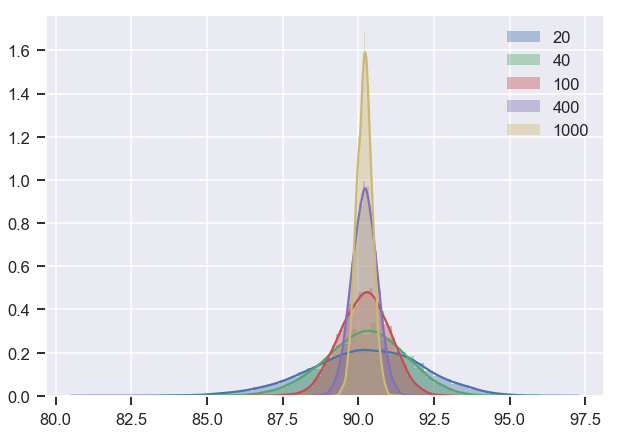

In [112]:
plt.figure(figsize=(10,7))

for s in sample_sizes:
    sns.distplot(data[s], label=str(s))
plt.legend()
#plt.savefig("histogram.pdf")

We have discovered that as the sample size grows, the distribution appears to follow the normal curve more closely. Additionally, the center of the distribution is at the population mean and the spread of the distribution shrinks (it depends on the SD of the distribution which we know decreases like $1/\sqrt{n}$.

This is the *Central Limit Theorem* For $n$ large in absolute terms and small relative to $N$ (if sampling without replacement), the probability distribution of the sample average becomes increasingly close to the normal curve with center at the population average and SD  $= \sigma/\sqrt{n}$. 

## Restaurant Inspection Scores - The Sample

Now suppose we are in the realm where we do not know or see the population and we have one sample of 100. 

Suppose that we want to use our sample to make statements about the population. 

Here is out sample:

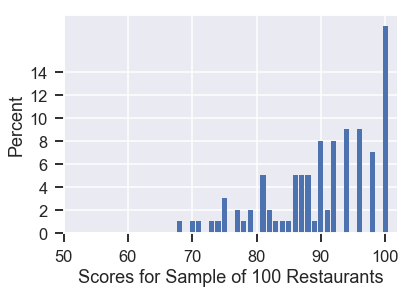

In [113]:
np.random.seed(37)
my_sample = ins['score'].sample(100, replace = False)
scoreCts_samp = 100 * pd.value_counts(my_sample, normalize = True)

barSample = plt.bar(scoreCts_samp.index.values, 
                    scoreCts_samp.values)
plt.xticks(np.arange(50, 101, 10))
plt.yticks(np.arange(0, 15, 2))
plt.xlabel('Scores for Sample of 100 Restaurants')
plt.ylabel('Percent')
#plt.savefig("barplot_mysamp.pdf")
plt.show()

We have seen in our earlier simulation studies that the *Empirical Distribution* of the sample looks approximately like the Population Distribution. This implies that parameter estimates based on our sample should be relatively good estimates of our population parameters.

In fact, the theory that we have proven or discovered via simulation that:

* the expected value of the sample average is the population average
* the variability in the sample average decreases like $\sigma/\sqrt{n}$
* for $n$ large, the sample average behaves like one draw from a distribution that looks like the normal curve that is centered at the population average and has a spread of $\sigma/\sqrt{n}$

We can use these results to make statements about the population average. For example, we can say that the population average is near:

In [114]:
np.mean(my_sample)

90.200000000000003

If we approximate the population SD with the sample SD (why is that OK), we can say that we expect the error of our estimate to be about:

In [115]:
np.std(my_sample)/np.sqrt(len(my_sample))

0.82000000000000006

### Bootstrapping the Sample Average

What happens when we want to estimate a parameter other than the population mean, such as a population percentile?  The theory that we have derived and simulated for the mean is a bit more delicate for other estimators.  For example, we may not be able to use the $\texttt{SD}(sample)/\sqrt{n}$ as an approximation for the SE of the estimaotr. Indeed, if the sampling distribution of the estimator is not close to normal, we may want to use a different approach for providing an estimate of the variabiity in our estimator? 

In this situation, we fall back on the mechanism for generating the data: the Simple Random Sample (whether with or without replacement). We have seen the empirical distribution of the sample is similar to the population distribution. We use this similarity to bootstrap ourselves into the realm of a population. In particular, we use the sample proportions as the population distribution. This is called the *bootstrap population*. From there we essentially perform Monte Carlo simulation with this population to understand the behavior of the paramter estimator.

That is, we take a sample from the *bootstrap population*, which we call a *bootstrap sample*. For the bootstrap sample, we calculate the estimator (e.g., mean, percentile, Huber estimator), which we call the *bootstrap statistic*. We repeat this process thousands of times and study the distribution of the bootstrap sampling distribution. 

Note that it is the *shape* and *variability* of the bootstrap sampling distribution that is of interest to us. The average is not of interest because by design, it will align with the bootstrap population (our original sample), not the true population. 

The code is nearly the same as before, we simply draw at random from our sample, rather than from the population. For now, we will ignore the difference between sampling with and without replacement and assume that we have a large enough population size that these are essentially equivalent.


In [116]:
np.random.seed(37)
boot_means = [
        my_sample.sample(100, replace = True).mean() 
        for _ in range(10000)]
boot_means[0:20]

[88.599999999999994,
 91.230000000000004,
 89.299999999999997,
 90.75,
 89.430000000000007,
 90.099999999999994,
 89.590000000000003,
 90.060000000000002,
 89.980000000000004,
 89.840000000000003,
 89.239999999999995,
 89.280000000000001,
 88.849999999999994,
 88.689999999999998,
 89.909999999999997,
 90.659999999999997,
 88.709999999999994,
 90.0,
 90.140000000000001,
 89.810000000000002]

Text(0.5,0,'10000 Bootstrapped Sample Averages (sample size = 100)')

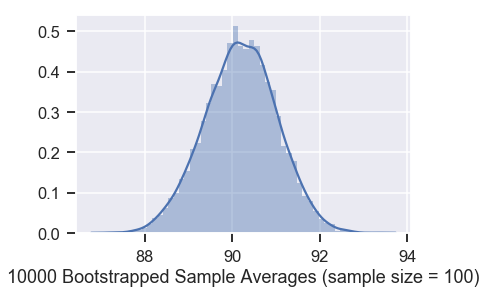

In [117]:
sns.distplot(boot_means)
plt.xlabel('10000 Bootstrapped Sample Averages (sample size = 100)')
#plt.savefig("bootstrap_hist.pdf")

As mentioned, the average of the 10000 bootstrapped means is very close to our sample average, 89.65, not the population average. This again is because the bootstrap population has a mean of 89.65 and that is the population that we are sampling from.

In [118]:
np.mean(boot_means)

90.193313000000003

Also notice that the SD of the 10000 sample averages is close to our sample average/10, i.e., 0.74, rather than the population average/10, which is 0.83. Given the skewness of the population (and the sample) there is another version of the bootstrap that is typically better to use in this situation. It is called the standardized bootstrap. We may introduce it.

Nonetheless, this is a rough approximation to the standard error of the statistic of interest.

In [119]:
np.std(boot_means)

0.82047758898765788

We will consider the bootstrap for other statistics next.